In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('combined_processed_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Region Name                                              9538 non-null   object 
 1   Country Name                                             9538 non-null   object 
 2   Year                                                     9538 non-null   int64  
 3   Sex                                                      9538 non-null   object 
 4   0 Year                                                   9538 non-null   float64
 5   1-4 Years                                                9538 non-null   float64
 6   5-9 Years                                                9538 non-null   float64
 7   10-14 Years                                              9538 non-null   float64
 8   15-19 Years                 

In [4]:
data.head()

Region Name Country Name  Year     Sex  0 Year  1-4 Years  5-9 Years  \
0      Africa   Cabo Verde  1980  Female     0.0        0.0        0.0   
1      Africa   Cabo Verde  1980    Male     0.0        0.0        0.0   
2      Africa   Cabo Verde  2011  Female     0.0        0.0        0.0   
3      Africa   Cabo Verde  2011    Male     0.0        0.0        0.0   
4      Africa        Egypt  1965  Female     0.0        0.0        0.0   

   10-14 Years  15-19 Years  20-24 Years  ...  60-64 Years  65-69 Years  \
0          0.0          1.0          0.0  ...          0.0          0.0   
1          0.0          2.0          0.0  ...          0.0          1.0   
2          0.0          0.0          1.0  ...          0.0          0.0   
3          3.0          1.0          4.0  ...          0.0          0.0   
4          0.0          6.0          1.0  ...          2.0          0.0   

   70-74 Years  75-79 Years  80-84 Years  85+ Years  Unknown Age  \
0          0.0          0.0          0.0        0.0          0.0   
1          0.0          1.0          0.0        0.0          0.0   
2          0.0          0.0          0.0        0.0          0.0   
3          1.0          0.0          1.0        1.0          0.0   
4          0.0          0.0          0.0        0.0          0.0   

   No of Suicides  Percentage of cause-specific deaths out of total deaths  \
0             1.0                                           0.227273         
1             6.0                                           0.983156         
2             5.0                                           1.161273         
3            37.0                                           3.804557         
4            11.0                                           0.026743         

   Death rate per 100 000 population  
0                           0.000000  
1                           0.000000  
2                           2.395998  
3                          28.024735  
4                           0.074515  

[5 rows x 27 columns]

In [5]:
#Qual o número total de suicídios por país por década? Mostrar apenas os top 20.

data['Decade'] = data['Year'].apply(lambda x: (x // 10) * 10)

data.groupby(['Country Name', 'Decade']).sum()['No of Suicides'].sort_values(ascending=False).head(20)

C:\Users\F6292959\AppData\Local\Temp\ipykernel_30164\2462146127.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Country Name', 'Decade']).sum()['No of Suicides'].sort_values(ascending=False).head(20)


Country Name              Decade
Russian Federation        1990      525527.0
                          2000      476898.0
United States of America  2010      434595.0
Russian Federation        1980      329616.0
United States of America  2000      329036.0
                          1990      306940.0
Japan                     2000      304225.0
United States of America  1980      292080.0
                          1970      260453.0
Russian Federation        2010      254015.0
Japan                     2010      239567.0
                          1990      232545.0
                          1980      227436.0
United States of America  1960      207509.0
Japan                     1950      197324.0
                          1970      188998.0
United States of America  1950      168195.0
Japan                     1960      158570.0
Republic of Korea         2010      140445.0
Ukraine                   1990      133750.0
Name: No of Suicides, dtype: float64

In [6]:
#Quantos suicídios há por gênero no Brasil por década?

mask = (data['Country Name'] == 'Brazil')

data.loc[mask].groupby(['Sex', 'Decade']).sum()['No of Suicides'].sort_values(ascending=False)

C:\Users\F6292959\AppData\Local\Temp\ipykernel_30164\235230887.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.loc[mask].groupby(['Sex', 'Decade']).sum()['No of Suicides'].sort_values(ascending=False)


Sex      Decade
Male     2010      88224.0
         2000      65550.0
         1990      47495.0
         1980      31612.0
Female   2010      23984.0
         2000      17228.0
         1990      13028.0
         1980      11513.0
Male     2020      10872.0
Female   2020       2966.0
Male     1970       2401.0
Female   1970       1085.0
Unknown  2010         22.0
         1990         15.0
         2000         10.0
         2020          3.0
Name: No of Suicides, dtype: float64

In [7]:
#Qual a média e a mediana de suicídios por região na década de 90?

mask = (data['Decade'] == 1980)

data.loc[mask].groupby('Region Name', group_keys=False).agg({'No of Suicides': ['mean', 'median']})

No of Suicides       
                                          mean median
Region Name                                          
Africa                               21.947368    8.0
Asia                               1411.456693  185.5
Central and South America           442.524590  142.5
Europe                             1646.113074  585.5
North America and the Caribbean    1433.926724    5.5
Oceania                             568.350000  390.0

C:\Users\F6292959\AppData\Local\Temp\ipykernel_30164\2586730292.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sum_by_country = data.groupby('Country Name').sum()['No of Suicides'].reset_index()


<BarContainer object of 118 artists>

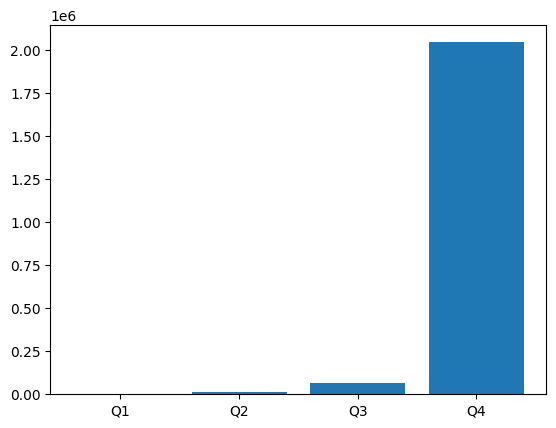

In [8]:
#Qual a distribuição da quatidade de suícidios pelo mundo por quartil?

data_sum_by_country = data.groupby('Country Name').sum()['No of Suicides'].reset_index()

data_sum_by_country['Range of Suicides'] = pd.qcut(data_sum_by_country['No of Suicides'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) 

data_sum_by_country = data_sum_by_country.sort_values('No of Suicides')

plt.bar(x=data_sum_by_country['Range of Suicides'], height=data_sum_by_country['No of Suicides'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19b4860e770>,
 'caps': [<matplotlib.lines.Line2D at 0x19b4860ecb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b4860e4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19b4860f1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b4860f490>],
 'means': []}

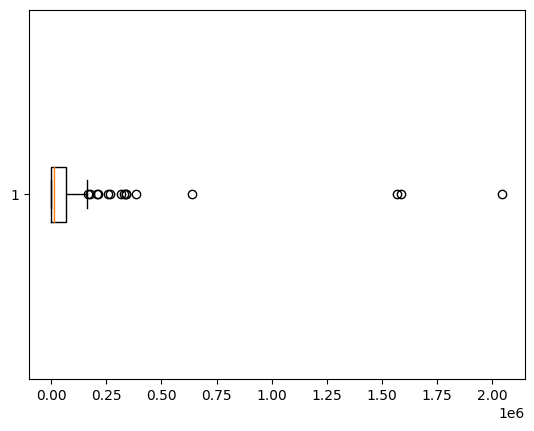

In [9]:
#Para entender melhor a distribuição acima, plote um gráfico de caixa a fim de identificar outliers.

plt.boxplot(data_sum_by_country['No of Suicides'], vert=False)

In [10]:
#Identifique os registros outliers na base a partir do cálculo realizado pelo boxplot.

q1 = data_sum_by_country['No of Suicides'].quantile(0.25)
q3 = data_sum_by_country['No of Suicides'].quantile(0.75)
iqr = q3 - q1

data_sum_by_country.loc[data_sum_by_country['No of Suicides'] > q3+1.5*iqr]

Country Name  No of Suicides  \
68                                              Mexico        169372.0   
100                                              Spain        176632.0   
18                                              Canada        206946.0   
45                                             Hungary        211663.0   
51                                               Italy        258041.0   
81                                              Poland        267246.0   
14                                              Brazil        316008.0   
86                                   Republic of Korea        329086.0   
39                                             Germany        338037.0   
113  United Kingdom of Great Britain and Northern I...        340411.0   
111                                            Ukraine        385164.0   
36                                              France        640219.0   
53                                               Japan       1568917.0   
89                                  Russian Federation       1586056.0   
114                           United States of America       2044787.0   

    Range of Suicides  
68                 Q4  
100                Q4  
18                 Q4  
45                 Q4  
51                 Q4  
81                 Q4  
14                 Q4  
86                 Q4  
39                 Q4  
113                Q4  
111                Q4  
36                 Q4  
53                 Q4  
89                 Q4  
114                Q4

In [11]:
#Salve o dataframe agrupado por país para análise posterior

data_sum_by_country.to_csv('data_sum_by_country.csv', index=False)